Statistics for Machine Learning By: Pratap Dangeti Publisher: Packt Publishing Pub. Date: July 21, 2017 Web ISBN-13: 978-1-78829-122-4 Print ISBN-13: 978-1-78829-575-8 Pages in Print Edition: 442

In [1]:
rm(list = ls())

# First change the following directory link to where all the input files do exist
setwd("C:\\dls\\Machine Learning\\data")

In [2]:
startTime <- Sys.time()
data <- c(4,5,1,2,7,2,6,9,3)

# Calculate Mean
dt_mean = mean(data) ; print(round(dt_mean,2))

# Calculate Median
dt_median = median(data); print(dt_median)

# Calculate Mode
func_mode <- function(input_dt){
  unq <- unique(input_dt)
  unq[which.max(tabulate(match(input_dt,unq)))]
}

dt_mode = func_mode(data); print(dt_mode)
endTime <- Sys.time()
timeTaken <- endTime - startTime
timeTaken

[1] 4.33
[1] 4
[1] 2


Time difference of 0.01302004 secs

In [3]:
startTime <- Sys.time()
# Descriptive statistics - dispersion
game_points <- c(35,56,43,59,63,79,35,41,64,43,93,60,77,24,82)

# Calculation Variance
dt_var = var(game_points); print(round(dt_var,2))

# Calculation Standard Deviation
dt_std = sd(game_points); print(round(dt_std,2))

# Calculation Range
range_val<-function(x) return(diff(range(x))) 
dt_range = range_val(game_points); print(dt_range)

# Calculation Quantiles
dt_quantile = quantile(game_points,probs = c(0.2,0.8,1.0)); print(dt_quantile)

# Calculation Inter quartile range
dt_iqr = IQR(game_points); print(dt_iqr)
endTime <- Sys.time()
timeTaken <- endTime - startTime
timeTaken

[1] 400.64
[1] 20.02
[1] 69
 20%  80% 100% 
39.8 77.4 93.0 
[1] 28.5


Time difference of 0.01902795 secs

In [4]:
# Hypothesis testing

startTime <- Sys.time()
xbar = 990; mu0 = 1000; s = 12.5 ; n = 30
t_smple = (xbar - mu0)/(s/sqrt(n));print (round(t_smple,2))

alpha = 0.05
t_alpha = qt(alpha,df= n-1);print (round(t_alpha,3))

p_val = pt(t_smple,df = n-1);print (p_val)



# Normal Distribution
xbar = 67; mu0 = 52; s = 16.3

# Normal distribution
# P (Z >= (x-mu)/sigma) 
# F(x) = P(X <= x)
pr = 1- pnorm(67, mean=52, sd=16.3)
print(paste("Prob. to score more than 67 is ",round(pr*100,2),"%"))
endTime <- Sys.time()
timeTaken <- endTime - startTime
timeTaken

[1] -4.38
[1] -1.699
[1] 7.035026e-05
[1] "Prob. to score more than 67 is  17.87 %"


Time difference of 0.02203393 secs

In [5]:
# Chi-square independence test
startTime <- Sys.time()
survey = read.csv("survey.csv",header=TRUE)

tbl = table(survey$Smoke,survey$Exer)
p_val = chisq.test(tbl)

print(paste("P-value is :",round(p_val$p.value,3)))
endTime <- Sys.time()
timeTaken <- endTime - startTime
timeTaken

Warning message in chisq.test(tbl):
"Chi-squared approximation may be incorrect"

[1] "P-value is : 0.483"


Time difference of 0.01403093 secs

In [6]:
#ANOVA
startTime <- Sys.time()
fetilizers = read.csv("fetilizers.csv",header=TRUE)

# Concatenate data rows into single vector
r = c(t(as.matrix(fetilizers)))
f = c("fertilizer1","fertilizer2","fertilizer3")
k = 3; n = 6

tm = gl(k,1,n*k,factor(f))
blk = gl(n,k,k*n)
av = aov(r ~ tm + blk)

smry = summary(av)
print(smry)
endTime <- Sys.time()
timeTaken <- endTime - startTime
timeTaken

            Df Sum Sq Mean Sq F value Pr(>F)  
tm           2   2155  1077.6   4.959 0.0319 *
blk          5   2239   447.8   2.061 0.1547  
Residuals   10   2173   217.3                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Time difference of 0.02003098 secs

(Intercept)          hp 
30.09886054 -0.06822828

(Intercept)          hp 
30.09886054 -0.06822828 


[1] "Iterations: 1145347 Optimal intercept: 30.0249510690729 Optimal slope: -0.0678124294226676"

Time difference of 3.00725 secs

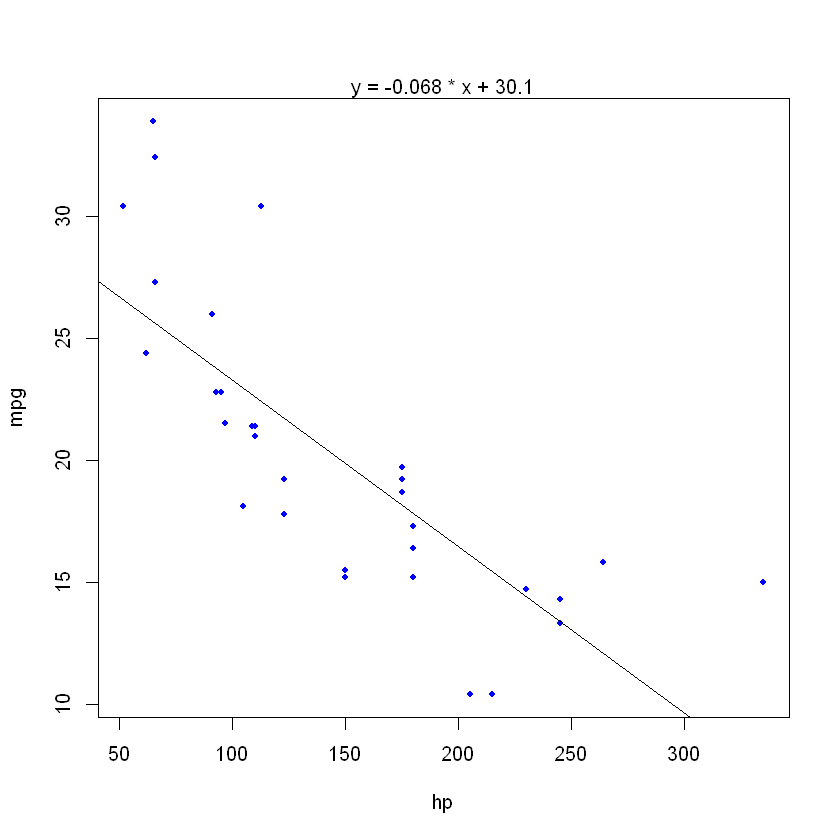

In [7]:
# Linear Regression vs. Gradient descent

train_data = read.csv("mtcars.csv",header=TRUE)

attach(train_data)
plot(hp, mpg, col = "blue", pch = 20)


# Linear Regression
model <- lm(mpg ~ hp, data = train_data)
coef(model)

abline(model)
mtext(paste('y =', round(coef(model)[[2]],3), '* x', '+', round( coef(model)[[1]],2)))


rm(list = ls())
startTime <- Sys.time()

# Linear Regression
train_data = read.csv("mtcars.csv",header=TRUE)
model <- lm(mpg ~ hp, data = train_data)
print (coef(model))


# Gradient descent
gradDesc <- function(x, y, learn_rate, conv_threshold, batch_size, max_iter) {
  m <- runif(1, 0, 1)
  c <- runif(1, 0, 1)
  ypred <- m * x + c
  MSE <- sum((y - ypred) ^ 2) / batch_size
  
  converged = F
  iterations = 0
  
  while(converged == F) {
    m_new <- m - learn_rate * ((1 / batch_size) * (sum((ypred - y) * x)))
    c_new <- c - learn_rate * ((1 / batch_size) * (sum(ypred - y)))
    
    m <- m_new
    c <- c_new
    ypred <- m * x + c
    MSE_new <- sum((y - ypred) ^ 2) / batch_size
    
    if(MSE - MSE_new <= conv_threshold) {
      converged = T
      return(paste("Iterations:",iterations,"Optimal intercept:", c, "Optimal slope:", m))
    }
    
    iterations = iterations + 1
    
    if(iterations > max_iter) { 
      converged = T
      return(paste("Iterations:",iterations,"Optimal intercept:", c, "Optimal slope:", m))
    }
    
    MSE = MSE_new
  }
}

gradDesc(x = hp,y =  mpg, learn_rate = 0.00003, conv_threshold = 1e-8, batch_size = 32, max_iter = 1500000)
endTime <- Sys.time()
timeTaken <- endTime - startTime
timeTaken

In [8]:
# Train & Test samples
startTime <- Sys.time()
full_data = read.csv("mtcars.csv",header=TRUE)

set.seed(123)
numrow = nrow(full_data)
trnind = sample(1:numrow,size = as.integer(0.7*numrow))

train_data = full_data[trnind,]
test_data = full_data[-trnind,]


# Train Validation & Test samples
trvaltest <- function(dat,prop = c(0.5,0.25,0.25)){
  nrw = nrow(dat)
  trnr = as.integer(nrw *prop[1])
  vlnr = as.integer(nrw*prop[2])
  set.seed(123)
  trni = sample(1:nrow(dat),trnr)
  trndata = dat[trni,]
  rmng = dat[-trni,]
  vlni = sample(1:nrow(rmng),vlnr)
  valdata = rmng[vlni,]
  tstdata = rmng[-vlni,]
  mylist = list("trn" = trndata,"val"= valdata,"tst" = tstdata)
  return(mylist)
}

outdata = trvaltest(mtcars,prop = c(0.5,0.25,0.25))
train_data = outdata$trn;valid_data = outdata$val;test_data = outdata$tst
endTime <- Sys.time()
timeTaken <- endTime - startTime
timeTaken

Time difference of 0.02403522 secs

In [11]:
# Grid Search on Decision Trees
startTime <- Sys.time()
library(rpart)
input_data = read.csv("ad.csv",header=FALSE)
input_data$V1559 = as.factor(input_data$V1559)
set.seed(123)
numrow = nrow(input_data)
trnind = sample(1:numrow,size = as.integer(0.7*numrow))

train_data = input_data[trnind,];test_data = input_data[-trnind,]
minspset = c(2,3);minobset = c(1,2,3)
initacc = 0

for (minsp in minspset){
  for (minob in minobset){
    tr_fit = rpart(V1559 ~.,data = train_data,method = "class",minsplit = minsp, minbucket = minob)
    tr_predt = predict(tr_fit,newdata = train_data,type = "class")
    tble = table(tr_predt,train_data$V1559)
    acc = (tble[1,1]+tble[2,2])/sum(tble)
    acc
    if (acc > initacc){
      tr_predtst = predict(tr_fit,newdata = test_data,type = "class")
      tblet = table(test_data$V1559,tr_predtst)
      acct = (tblet[1,1]+tblet[2,2])/sum(tblet)
      acct
      print(paste("Best Score"))
      print( paste("Train Accuracy ",round(acc,3),"Test Accuracy",round(acct,3)))
      print( paste(" Min split ",minsp," Min obs per node ",minob))
      print(paste("Confusion matrix on test data"))
      print(tblet)
      precsn_0 = (tblet[1,1])/(tblet[1,1]+tblet[2,1])
      precsn_1 = (tblet[2,2])/(tblet[1,2]+tblet[2,2])
      print(paste("Precision_0: ",round(precsn_0,3),"Precision_1: ",round(precsn_1,3)))
      rcall_0 = (tblet[1,1])/(tblet[1,1]+tblet[1,2])
      rcall_1 = (tblet[2,2])/(tblet[2,1]+tblet[2,2])
      print(paste("Recall_0: ",round(rcall_0,3),"Recall_1: ",round(rcall_1,3)))
      initacc = acc
    }
  }
}
endTime <- Sys.time()
timeTaken <- endTime - startTime
timeTaken

[1] "Best Score"
[1] "Train Accuracy  0.971 Test Accuracy 0.965"
[1] " Min split  2  Min obs per node  1"
[1] "Confusion matrix on test data"
   tr_predtst
      0   1
  0 832   7
  1  27 118
[1] "Precision_0:  0.969 Precision_1:  0.944"
[1] "Recall_0:  0.992 Recall_1:  0.814"


Time difference of 59.64115 secs